### Importing the Libraries

In [1]:
import numpy as np  # For using n-d array mathematical operations
import pandas as pd # For open csv files and create dataframe
import matplotlib.pyplot as plt # For plotting graphs

### Reading CSV Files and Checking the content in it

In [2]:
# Opening csv file
dataset = pd.read_csv('startup_funding.csv', skipinitialspace = True, encoding = 'utf-8')
df = dataset.copy() # Copying the dataset dataframe in df in case anything goes wrong, we can start again
df.head(10) # Showing first 10 rows in df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


### Solution for given problem
To find out top 5 investors who funded most, we can use InvestorsName column in the dataset and count the fundings for each investor.

Sequoia Capital 64
Accel Partners 54
Kalaari Capital 46
SAIF Partners 41
Blume Ventures 40


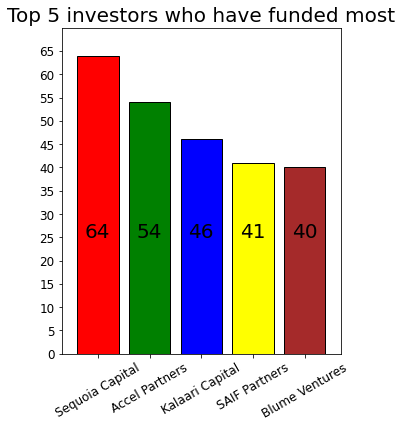

In [58]:
df.InvestorsName.fillna('', inplace = True) # Replacing nan values in column
allInvestors = df.InvestorsName # Fetching all the investors from the dataset
investorsWithCount = {} # Creating a dictionary for the count of fundings by each investor
for investors in allInvestors:
    investor = investors.split(', ')
    for invest in investor:
        investment = invest.split(' and ')
        for inv in investment:
            i = inv.split(',')
            for name in i:
                if name != '':
                    if name[-1] == ' ':
                        name = name[:-1]
                    if name[0] == ' ':
                        name = name[1:]
                    investorsWithCount[name] = investorsWithCount.get(name,0)+1

# Fetching all the investors and their count from the dictionary
investors = list(investorsWithCount.keys())
count = list(investorsWithCount.values())

# Converting two 1D arrays into a 2D array
investorsWithCount = list(zip(investors,count))
investorsWithCount.sort(reverse = True, key = lambda x:x[1]) # Sorting the array as per count

investorsWithCount = np.array(investorsWithCount)
investors = investorsWithCount[:,0]
count = np.array(investorsWithCount[:,1], dtype = int)

# Printing top 5 investors with count
for index in range(5):
    print(investors[index], count[index])
    
# Printing the bar graph
plt.figure(figsize = (5,6))
plt.bar(investors[:5], height = count[:5], 
        color = ['red', 'green', 'blue', 'yellow', 'brown'], edgecolor = 'black')
plt.xticks(rotation = 30, fontsize = 12)
plt.yticks(np.arange(0,70,5), fontsize = 12)
plt.axis([-0.7,4.7,0,70])
for index in range(5):
    plt.text(index-0.25,25, str(count[index]), fontsize = 20)
plt.title('Top 5 investors who have funded most', fontsize = 20)
plt.show()